In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('../data/rawjobs.csv')

print(f"Đã load dữ liệu thành công!")
print(f"Số dòng: {df.shape[0]:,}")
print(f"Số cột: {df.shape[1]}")

Đã load dữ liệu thành công!
Số dòng: 85,470
Số cột: 11


In [13]:
print("\nTHÔNG TIN CƠ BẢN VỀ DỮ LIỆU")

print("\nTên các cột:")
print(df.columns.tolist())

print("\nKiểu dữ liệu của các cột:")
print(df.dtypes)

print("\nThông tin tổng quan:")
print(df.info())

print("\nKích thước bộ nhớ:")
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"Bộ nhớ sử dụng: {memory_usage:.2f} MB")


THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

Tên các cột:
['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'salary', 'salary_min', 'salary_max', 'unit']

Kiểu dữ liệu của các cột:
job_title          object
job_type           object
position_level     object
city               object
experience         object
skills             object
job_fields         object
salary             object
salary_min        float64
salary_max        float64
unit               object
dtype: object

Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85470 entries, 0 to 85469
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title       85463 non-null  object 
 1   job_type        85470 non-null  object 
 2   position_level  85470 non-null  object 
 3   city            85438 non-null  object 
 4   experience      85470 non-null  object 
 5   skills          74176 non-null  object 
 6 

In [9]:
print("\nXEM MẪU DỮ LIỆU")

print("\n5 dòng đầu tiên:")
print(df.head())

print("\n5 dòng cuối cùng:")
print(df.tail())

print("\n5 dòng ngẫu nhiên:")
print(df.sample(5))


XEM MẪU DỮ LIỆU

5 dòng đầu tiên:
                   job_title              job_type          position_level  \
0    trưởng phòng kinh doanh  nhân viên chính thức  trưởng nhóm , giám sát   
1  nhân viên qc ngành cơ khí  nhân viên chính thức               nhân viên   
2      trưởng phòng đấu thầu  nhân viên chính thức  trưởng nhóm , giám sát   
3      home textile designer  nhân viên chính thức               nhân viên   
4       nhân viên kinh doanh  nhân viên chính thức               nhân viên   

          city     experience  \
0  hồ chí minh  lên đến 1 năm   
1  hồ chí minh     trên 1 năm   
2  hồ chí minh      5 - 7 năm   
3     hưng yên     5 - 15 năm   
4  hồ chí minh     trên 1 năm   

                                              skills  \
0                                                NaN   
1  production planning staff, chuyên viên iso, th...   
2  trưởng phòng xây dựng, trưởng phòng đấu thầu, ...   
3                                                NaN   
4                

In [15]:
print("THỐNG KÊ MÔ TẢ")

print("\nThống kê cho các cột số:")
print(df.describe())

print("\nThống kê cho các cột phân loại:")
print(df.describe(include=['object']))

THỐNG KÊ MÔ TẢ

Thống kê cho các cột số:
         salary_min    salary_max
count  85470.000000  85470.000000
mean      11.875715     19.191847
std       14.763057     16.023232
min        0.000000      0.000000
25%        8.000000     12.000000
50%       10.000000     15.000000
75%       15.000000     21.000000
max      900.000000    700.000000

Thống kê cho các cột phân loại:
                   job_title   job_type          position_level    city  \
count                  85463      85470                   85470   85438   
unique                 23576         27                      26     466   
top     nhân viên kinh doanh  full-time  nhân viên, chuyên viên  hà nội   
freq                    1782      37135                   34385   26224   

           experience                                skills  \
count           85470                                 74176   
unique            181                                 20484   
top     không yêu cầu  tư vấn bán hàng, chăm sóc khách 

In [17]:
# Đếm giá trị thiếu
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Cột': missing_values.index,
    'Số lượng thiếu': missing_values.values,
    'Phần trăm (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Số lượng thiếu'] > 0].sort_values('Số lượng thiếu', ascending=False)

print("\nCác cột có giá trị thiếu:")
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("Không có giá trị thiếu trong dữ liệu!")


Các cột có giá trị thiếu:
       Cột  Số lượng thiếu  Phần trăm (%)
    skills           11294      13.213993
job_fields            7625       8.921259
      city              32       0.037440
 job_title               7       0.008190


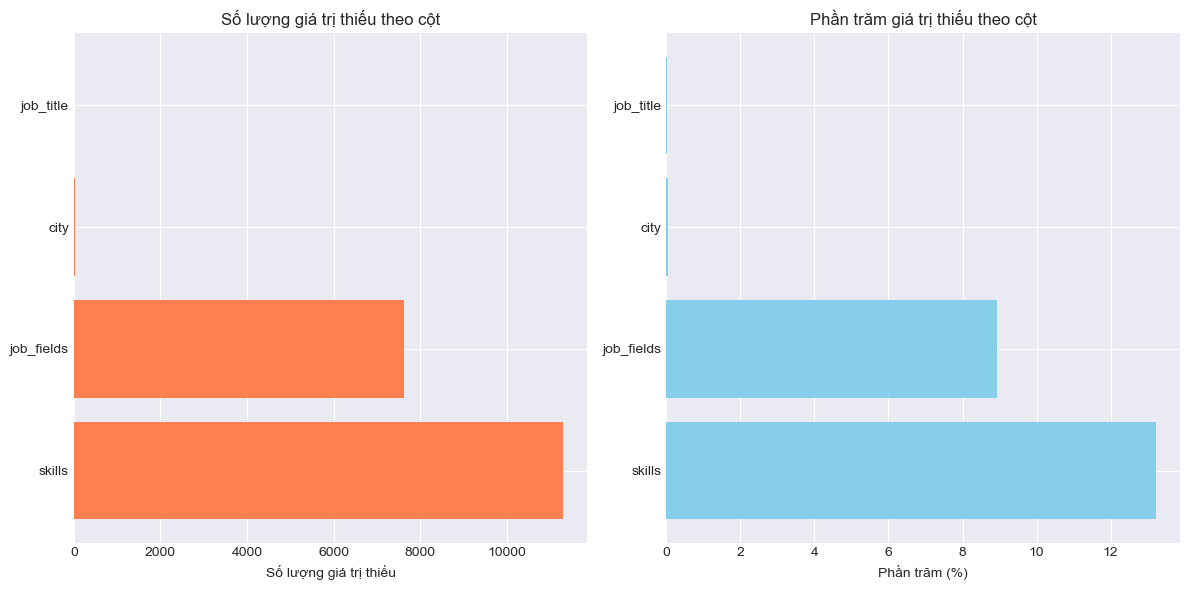


Đã lưu biểu đồ giá trị thiếu!


In [ ]:
# Visualize giá trị thiếu
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.barh(missing_df['Cột'], missing_df['Số lượng thiếu'], color='coral')
    plt.xlabel('Số lượng giá trị thiếu')
    plt.title('Số lượng giá trị thiếu theo cột')
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.barh(missing_df['Cột'], missing_df['Phần trăm (%)'], color='skyblue')
    plt.xlabel('Phần trăm (%)')
    plt.title('Phần trăm giá trị thiếu theo cột')
    plt.tight_layout()
    
    plt.savefig('./figures/01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nĐã lưu biểu đồ giá trị thiếu!")

In [19]:
print("\nPHÂN TÍCH CÁC CỘT PHÂN LOẠI")

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    print(f"\n6.{categorical_columns.index(col)+1}. Cột: {col}")
    print(f"   - Số giá trị unique: {df[col].nunique()}")
    print(f"   - Top 10 giá trị phổ biến nhất:")
    value_counts = df[col].value_counts().head(10)
    for idx, (value, count) in enumerate(value_counts.items(), 1):
        percent = (count / len(df)) * 100
        print(f"      {idx}. {value}: {count:,} ({percent:.2f}%)")


PHÂN TÍCH CÁC CỘT PHÂN LOẠI

6.1. Cột: job_title
   - Số giá trị unique: 23576
   - Top 10 giá trị phổ biến nhất:
      1. nhân viên kinh doanh: 1,782 (2.08%)
      2. kế toán tổng hợp: 922 (1.08%)
      3. nhân viên kinh doanh thị trường: 367 (0.43%)
      4. chuyên viên kinh doanh: 348 (0.41%)
      5. nhân viên kế toán: 346 (0.40%)
      6. nhân viên chăm sóc khách hàng: 313 (0.37%)
      7. chuyên viên tư vấn giáo dục: 313 (0.37%)
      8. trưởng phòng kinh doanh: 291 (0.34%)
      9. kế toán nội bộ: 283 (0.33%)
      10. nhân viên tư vấn trả góp: 278 (0.33%)

6.2. Cột: job_type
   - Số giá trị unique: 27
   - Top 10 giá trị phổ biến nhất:
      1. full-time: 37,135 (43.45%)
      2. nhân viên chính thức: 28,859 (33.77%)
      3. toàn thời gian cố định: 14,225 (16.64%)
      4. toàn thời gian: 1,526 (1.79%)
      5. part-time: 1,071 (1.25%)
      6. full-time , part-time: 942 (1.10%)
      7. thực tập: 536 (0.63%)
      8. khác: 228 (0.27%)
      9. bán thời gian: 166 (0.19%)
    

In [21]:
print("\nPHÂN TÍCH CÁC CỘT SỐ")

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCác cột số: {numerical_columns}")

# Thống kê chi tiết cho các cột số
for col in numerical_columns:
    print(f"\n{numerical_columns.index(col)+1}. Cột: {col}")
    print(f"   - Min: {df[col].min():,.2f}")
    print(f"   - Max: {df[col].max():,.2f}")
    print(f"   - Mean: {df[col].mean():,.2f}")
    print(f"   - Median: {df[col].median():,.2f}")
    print(f"   - Std: {df[col].std():,.2f}")
    print(f"   - Q1 (25%): {df[col].quantile(0.25):,.2f}")
    print(f"   - Q3 (75%): {df[col].quantile(0.75):,.2f}")


PHÂN TÍCH CÁC CỘT SỐ

Các cột số: ['salary_min', 'salary_max']

1. Cột: salary_min
   - Min: 0.00
   - Max: 900.00
   - Mean: 11.88
   - Median: 10.00
   - Std: 14.76
   - Q1 (25%): 8.00
   - Q3 (75%): 15.00

2. Cột: salary_max
   - Min: 0.00
   - Max: 700.00
   - Mean: 19.19
   - Median: 15.00
   - Std: 16.02
   - Q1 (25%): 12.00
   - Q3 (75%): 21.00



PHÂN TÍCH PHÂN PHỐI DỮ LIỆU


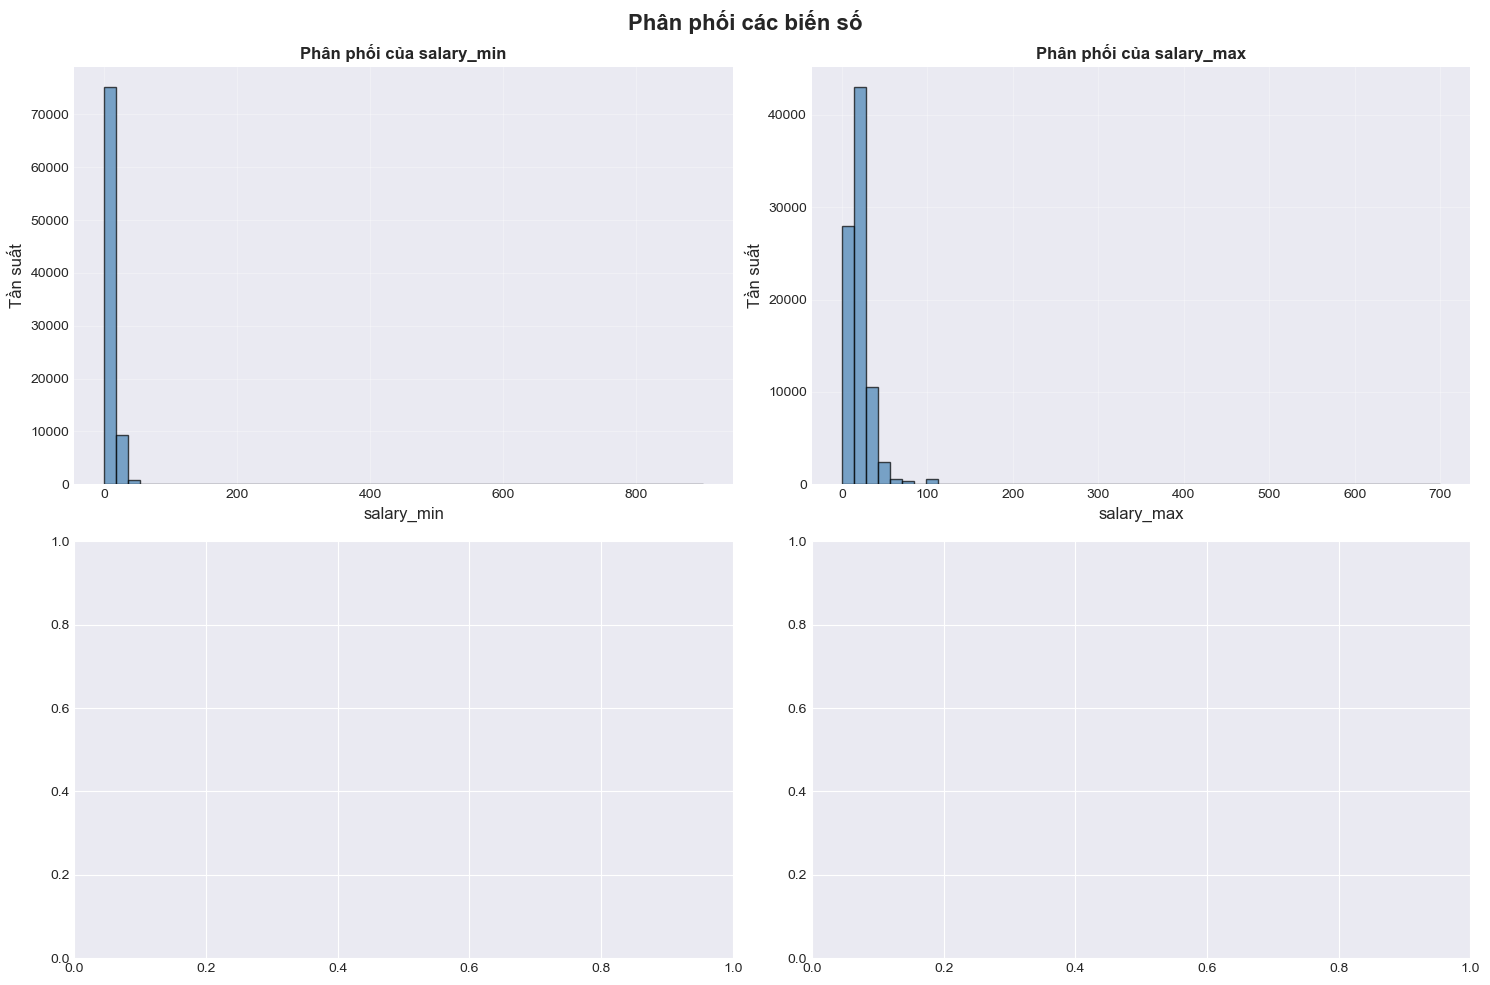


Đã lưu biểu đồ phân phối!


In [ ]:
print("\nPHÂN TÍCH PHÂN PHỐI DỮ LIỆU")

# Vẽ histogram cho các cột số
if len(numerical_columns) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Phân phối các biến số', fontsize=16, fontweight='bold')
    
    for idx, col in enumerate(numerical_columns[:4]):
        row = idx // 2
        col_idx = idx % 2
        
        axes[row, col_idx].hist(df[col].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_xlabel(col, fontsize=12)
        axes[row, col_idx].set_ylabel('Tần suất', fontsize=12)
        axes[row, col_idx].set_title(f'Phân phối của {col}', fontsize=12, fontweight='bold')
        axes[row, col_idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./figures/01_distribution_numerical.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nĐã lưu biểu đồ phân phối!")


PHÂN TÍCH TƯƠNG QUAN

Ma trận tương quan:
            salary_min  salary_max
salary_min    1.000000    0.281406
salary_max    0.281406    1.000000


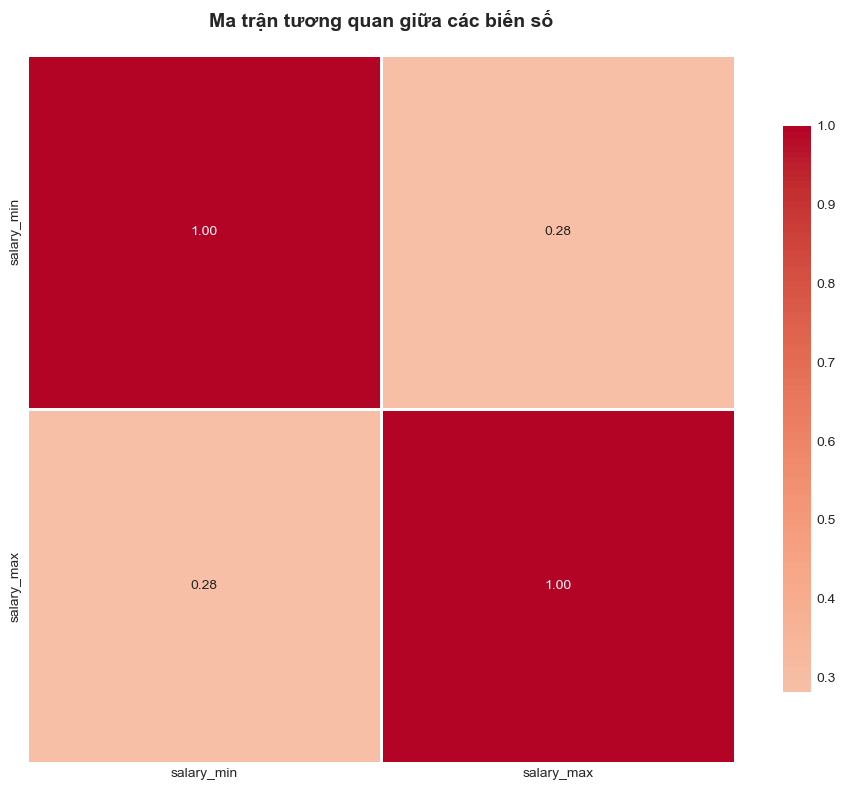


✓ Đã lưu ma trận tương quan!


In [ ]:
print("\nPHÂN TÍCH TƯƠNG QUAN")

if len(numerical_columns) > 1:
    # Ma trận tương quan
    correlation_matrix = df[numerical_columns].corr()
    
    print("\nMa trận tương quan:")
    print(correlation_matrix)
    
    # Vẽ heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Ma trận tương quan giữa các biến số', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('./figures/01_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Đã lưu ma trận tương quan!")


PHÁT HIỆN OUTLIERS (NGOẠI LAI)

salary_min:
   - Số outliers: 2659 (3.11%)
   - Giới hạn dưới: -2.50
   - Giới hạn trên: 25.50

salary_max:
   - Số outliers: 7695 (9.00%)
   - Giới hạn dưới: -1.50
   - Giới hạn trên: 34.50


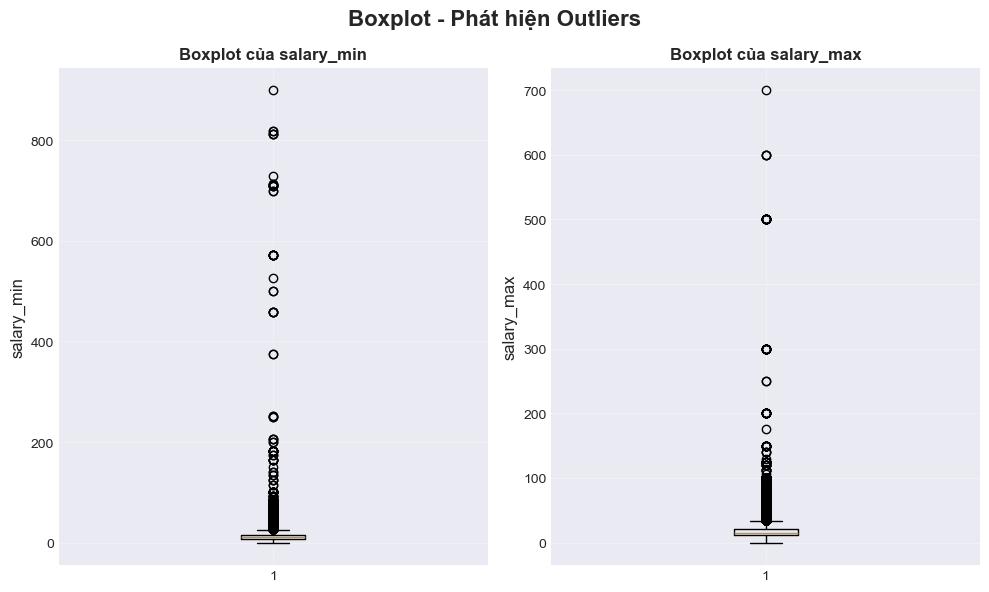


Đã lưu biểu đồ outliers!


In [ ]:
print("\nPHÁT HIỆN OUTLIERS (NGOẠI LAI)")

# Vẽ boxplot cho các cột số
if len(numerical_columns) > 0:
    fig, axes = plt.subplots(1, len(numerical_columns), figsize=(5*len(numerical_columns), 6))
    fig.suptitle('Boxplot - Phát hiện Outliers', fontsize=16, fontweight='bold')
    
    if len(numerical_columns) == 1:
        axes = [axes]
    
    for idx, col in enumerate(numerical_columns):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_ylabel(col, fontsize=12)
        axes[idx].set_title(f'Boxplot của {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        
        # Tính toán outliers bằng IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        print(f"\n{col}:")
        print(f"   - Số outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        print(f"   - Giới hạn dưới: {lower_bound:,.2f}")
        print(f"   - Giới hạn trên: {upper_bound:,.2f}")
    
    plt.tight_layout()
    plt.savefig('./figures/01_outliers_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\nĐã lưu biểu đồ outliers!")

In [26]:
print("\nPHÂN TÍCH GIÁ TRỊ TRÙNG LẶP")

duplicates = df.duplicated().sum()
duplicate_percent = (duplicates / len(df)) * 100

print(f"\nSố dòng trùng lặp: {duplicates:,} ({duplicate_percent:.2f}%)")

if duplicates > 0:
    print("\nCác dòng trùng lặp đầu tiên:")
    print(df[df.duplicated(keep=False)].head(10))


PHÂN TÍCH GIÁ TRỊ TRÙNG LẶP

Số dòng trùng lặp: 40,531 (47.42%)

Các dòng trùng lặp đầu tiên:
                                             job_title              job_type  \
17                                  nhân viên telesale  nhân viên chính thức   
21                     chuyên viên phát triển thầu thợ  nhân viên chính thức   
35   chuyên viên tư vấn giáo dục thu nhập từ 13 tri...  nhân viên chính thức   
49   phó giám đốc chi nhánh phụ trách mảng khdn chi...  nhân viên chính thức   
105  nhân viên phát triển thị trường quận huyện đăn...  nhân viên chính thức   
111                          warehouse admin admin kho  nhân viên chính thức   
112                      trưởng nhóm tư vấn tuyển sinh  nhân viên chính thức   
142                                          c b staff  nhân viên chính thức   
147                                   kế toán tổng hợp  nhân viên chính thức   
148                                         qa manager  nhân viên chính thức   

             position_le

In [ ]:
print("\nTÓM TẮT KẾT QUẢ KHÁM PHÁ")

summary = {
    'Tổng số dòng': f"{len(df):,}",
    'Tổng số cột': df.shape[1],
    'Số cột phân loại': len(categorical_columns),
    'Số cột số': len(numerical_columns),
    'Tổng giá trị thiếu': f"{df.isnull().sum().sum():,}",
    'Phần trăm thiếu': f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%",
    'Số dòng trùng lặp': f"{duplicates:,}",
    'Bộ nhớ sử dụng (MB)': f"{memory_usage:.2f}"
}

print("\nTỔNG QUAN DỮ LIỆU:")
for key, value in summary.items():
    print(f"   • {key}: {value}")

print("HOÀN THÀNH KHÁM PHÁ DỮ LIỆU!")

# Lưu dữ liệu tổng quan
summary_df = pd.DataFrame(list(summary.items()), columns=['Chỉ số', 'Giá trị'])
summary_df.to_csv('../data/processed/exploration_summary.csv', index=False, encoding='utf-8-sig')
print("\nĐã lưu tổng quan vào file exploration_summary.csv")


TÓM TẮT KẾT QUẢ KHÁM PHÁ

TỔNG QUAN DỮ LIỆU:
   • Tổng số dòng: 85,470
   • Tổng số cột: 11
   • Số cột phân loại: 9
   • Số cột số: 2
   • Tổng giá trị thiếu: 18,958
   • Phần trăm thiếu: 2.02%
   • Số dòng trùng lặp: 40,531
   • Bộ nhớ sử dụng (MB): 77.13

HOÀN THÀNH KHÁM PHÁ DỮ LIỆU!

Đã lưu tổng quan vào file exploration_summary.csv
